In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('2638HK.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-29,5.41,5.42,5.23,5.34,3.120969,516627168
1,2014-01-30,5.31,5.34,5.24,5.26,3.074212,111563301
2,2014-02-04,5.15,5.22,5.13,5.16,3.015767,47338904
3,2014-02-05,5.21,5.26,5.17,5.17,3.021612,32350326
4,2014-02-06,5.18,5.29,5.18,5.26,3.074212,15992990
...,...,...,...,...,...,...,...
2521,2024-04-24,4.65,4.69,4.64,4.68,4.680000,4592646
2522,2024-04-25,4.67,4.70,4.66,4.70,4.700000,1675200
2523,2024-04-26,4.70,4.74,4.69,4.73,4.730000,2312051
2524,2024-04-29,4.73,4.75,4.68,4.72,4.720000,4221247


<Axes: >

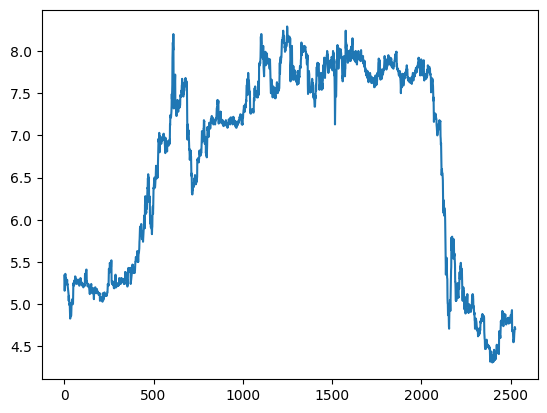

In [3]:
data['Close'].plot()

In [4]:
train_data = data.iloc[:int(.99*len(data)), :]
test_data = data.iloc[int(.99*len(data)):, :]

In [5]:
#Define the features and target variables
features = ['Open', 'Volume']
target = 'Close'

In [6]:
model = xgb.XGBRegressor(device='cuda')
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
predictions = model.predict(test_data[features])
print('model Prediction: ')
print(predictions)

model Prediction: 
[4.8071547 4.8873734 4.8548803 4.845497  4.8480124 4.854872  4.8904138
 4.940319  4.8401694 4.6888    4.7085185 4.6808004 4.6693106 4.665065
 4.672369  4.5965977 4.531499  4.5808706 4.5295525 4.552758  4.6118116
 4.6431913 4.6825547 4.681303  4.703035  4.6952477]


c:\Users\mariu\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:160: UserWarning: [15:04:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [8]:
print('Actual Values:')
print(test_data[target])

Actual Values:
2500    4.87
2501    4.87
2502    4.86
2503    4.87
2504    4.87
2505    4.89
2506    4.92
2507    4.93
2508    4.68
2509    4.68
2510    4.69
2511    4.69
2512    4.69
2513    4.64
2514    4.61
2515    4.55
2516    4.58
2517    4.57
2518    4.56
2519    4.62
2520    4.65
2521    4.68
2522    4.70
2523    4.73
2524    4.72
2525    4.71
Name: Close, dtype: float64


In [9]:
accuracy = model.score(test_data[features], test_data[target])
print("Accuracy: ")
print(accuracy)

Accuracy: 
0.8479672863276752


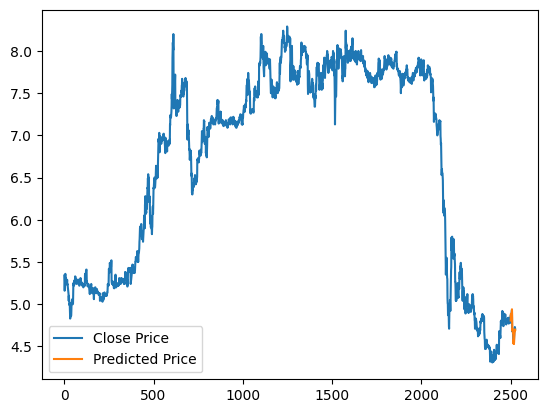

In [10]:
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data['Close'].index, predictions, label = 'Predicted Price')
plt.legend()
plt.show()